# PaleoSTeHM: A modern, scalable Spatio-Temporal Hierarchical Modeling framework for paleo-environmental data

Yucheng Lin - yc.lin@rutgers.edu

with Alex Reedy and Robert Kopp

## Tutorial 1: Hierachical modelling introduction and data level modelling (10-15 minutes)
**PaleoSTeHM background**

[PaleoSTeHM](https://www.nsf.gov/awardsearch/showAward?AWD_ID=2148265&HistoricalAwards=false) is a NSF funded project under award 2002437 and 2148265, aiming to develop a framework for for spatiotemporal hierarchical modeling of paleodata that builds upon modern, scalable software infrastructure for machine learning. The developments of PaleoSTeHM framework are largely based on previous work by [Rutgers Earth System Science & Policy Lab](https://earthscipol.net/), for example, [Kopp et al., 2014](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014EF000239), [Kopp et al., 2017](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017EF000663) and [Ashe et al., 2019](https://www.sciencedirect.com/science/article/pii/S0277379118302130), which did not reflect modern software engineering best practices, making them challenging to use without substantial training. Therefore, PaleoSTeHM is desgined to improve this by everaging an existing, widely used machine-learning framework at the base level (pyro), and builtd to take advantage of current and future computational advances without modifications to the user-facing product. [pyro](pyro.ai) is a universal probabilistic programming language written in Python and supported by PyTorch on the backend. Hnce, PaeloSTeHM supports the auto-differentiation and GPU accelration properties from Pytroch. 

In this notebook, we will go briefly through the background theories of spatiotemporal hierarchical modeling of paleo sea-level data based on [Ashe et al., (2019)](https://www.sciencedirect.com/science/article/pii/S0277379118302130). We will use paleo sea-level for illustration in this notebook, wheereas, the content for analysing sea-level data can be applied to any paleo environmental data. Some useful information about hierachical modelling of sea-level about data will be provided, including data, process and parameter level models. A detailed explination of data level model is included in this notebook with an illustrative example of modelling coral-reef based sea-level data.

### Hierachical statistical modelling

Hierarchical statistical models, often implemented in a Bayesian framework, partition random effects into levels to clarify assumptions in statistical analysis. Based on the Bayes theorem, the conditional probability of the observed data, $y$, can be inverted from conditional probability of unknown parameter(s) or process(es), $\theta$, given the data, $y$:

$$
p(\theta | y) = \frac{p(y|\theta) p(\theta)}{p(y)}
$$

The likelihood function, $p(y|\theta)$ (also known as a sampling or data distribution), is the probability of observing the data as described by the parameter(s) or process(es) of the fitted model.  The prior distribution, $p(\theta)$, expresses a priori beliefs about the unknown parameter(s) or process(es), before data have been observed, and $p(y)$ is the marginal likelihood of the data, defined as the probability of observing y averaged across all possible processes or parameters. The conditional, posterior distribution, $p(\theta | y)$, is the resulting process or parameter distribution, given the observations. Becuase $p(y)$ is often intractable and is irrelevant provided the observations are static, we use the alternative form of Bayes’ theorem that states the posterior is proportional to the likelihood times the prior:

$$
p(\theta | y) \propto p(y|\theta) p(\theta)
$$


In a simple hierarchical statistical model of relative sea-level (RSL), they separate the underlying phenomenon of RSL change from its variability and the noise in the observation process. By inverting conditional probabilities, hierarchical models estimate time series or fields with probabilistic uncertainty. Each level of a hierarchical model quantifies uncertainties separately, requiring careful consideration of sources of uncertainties. To analyse sea-level data, three levels are typically defined: `data level`, `process level`, and `parameter level`: 

<img width=700px src="Hierachical_framework.png"/>

where $p$ denotes 'probability', $\propto$ indicates 'is proportional to' and '|' represents 'given'. Data level characterizes the relationship between RSL and the observed RSL data (instrumental and/or proxy), $y$, and incorporates measurement, inferential (e.g., from the conversion of a proxy's elevation to a distribution of RSL), and dating uncertainties (inherited from various geochronology techniques). It can be understood as the distributiuon of observing a specifc sea-level height at specific age, given the underlying latent process ($f$) along with measurement, inferential and dating uncertainties (indicated by $\theta_{d}$).

Process level separates the underlying phenomenon of interest, such as sea level, and its variability from the noisy mechanism by which this underlying process is observed (i.e., data level). This process model incorporates scientific knowledge and uncertainty into the estimation of the true RSL process through its conditional parameters $\theta_{s}$, which can be unobserved physical model parameters (i.e., Earth mantle rheology for a glaical isostatic adjustment model) or statistical model parameters (e.g., linear rate for a linear sea-level model) or hyperparameters (e.g., length scale and variance for Gaussian Process model). 

On the bottom level, the parameter model specifies the prior distribution of all unknown parameters, which captures key attributes of the data and process levels through unobserved parameters mentioned above. More details about each level will be provided below with examples.




## Data Level Modelling Tutorial

In this tutorial, we will introduce modelling method for data level with an illustration of modeling coral reef sea-level data from the Great Barrier Reef. As you can see from the equation above, parameter mdoel represent our prior information about parameters used in data and process level modelling. In this case, we will illustrative parameter level modelling along wiht data level modelling (in this tutorial) and process level mdoelling (next tutorial). 

In this tutorial, we will use two types of parameter levels to represent vertical sea-level reconstruction uncertainties and their impact on sea-level rise rate inference. 

### Data level

The data level of a hierarchical statistical model represents the relationship between uncertain observations and true RSL. The specific type of data and associated uncertainty determine the form of this relationship and hence the form of the data-level model. For spatio-temporal modelling of sea-level data, it can be represented by:

$$
y_{i} = f(t_{i},x_{i}) + \epsilon_{i}
$$

where $y_{i}$ is observational sea-level data $i$ at time $t$ and location $x$,  $f(t_{i},x_{i})$ is true relative sea level (RSL; under the assumption of model) at the time and location $y_{i}$ was observed; $\epsilon_{i}$ indicates RSL vertical reconstruction uncertainty:

$$
\epsilon_{i} = \nu^{1}_{i} + \nu^{2}_{i} +...
$$

where $\nu^{1}_{i}$ and $\nu^{2}_{i}$ denote measurement and inferential uncertainty (e.g., sea-level data indicative meaning). For some data, other uncertainty sources (e.g., from tidal range variation) can also being added to $\epsilon_{i}$. A common assumption for many sea-level studies is that $\epsilon_{i}$ are independent and normally distributed, such that:

$$
\epsilon_{i} \sim N(0,\sigma_{\epsilon_{i}})
$$

where $\sim$ indicates 'is distributed as' with $N$ representing a normal distribution with 0 mean and $\sigma_{\epsilon_{i}}$ standard deviation. 

Because many paleo sea-level data are subject to geochronological uncertainty, temporal uncertainties in RSL data are seperated from process noise at the data level:

$$
\overline{t}_{i} = t_{i} + \delta{i}
$$

where $\overline{t}_{i}$ is the central point estimate of the calibrated age from geochronology, $t_{i}$ is the true age (under the assumptions of the model), which is unknown and unobserved, and $\delta_{i}$ is unobserved temporal error, which is often incorporated as normal uncertainty within the analysis:
$$
\delta_{i} \sim N(0,\sigma_{\delta_{i}})
$$
where $\sigma_{\delta_{i}}$ defines the standard deviation of age uncertainty from differnet chronological techniques. Unlike $t_{i}$ that are subject to substantial uncertainty, we usually assume there is no uncertainty in RSL data location $x_{i}$. 

Taking these altogether, to define a sea-level data level model, we need to specify the following parameters: (1) RSL vertical reconstruction uncertainty, which is defined by parameter $\sigma_{\epsilon}$; (2) RSL data age measurement uncertainty, which is defined by parameter $\sigma_{\delta}$. Therefore the parameters for data level models can be represented as:
$$
\theta_{d} = [\sigma_{\epsilon}, \sigma_{\delta}]
$$

#### Illustrative example: geological coral reef data model
Coral reef is a commonly-used type sea-level data that can inform us about sea-level change in the past (e.g., [Yokoyama et al., 2018](https://www.nature.com/articles/s41586-018-0335-4)). To use coral reef records to reconstrcut past sea-level ($y$), we need to at least understand the following information of each coral record: (1) modern elevation; (2) coral species; (3) coral species relationship with mean sea-level.  

To illustate, let's use a subset of real coral reef records from the Great Barrier Reef ([Yokoyama et al., 2018](https://www.nature.com/articles/s41586-018-0335-4)), which is provided as an excel file. Let's check it out:



In [1]:
#load python modules to deal with data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import warnings
import sys
sys.path.append('../../')
import PSTHM
import pyro.distributions as dist
import torch 
import pyro

warnings.filterwarnings("ignore")
#set plotting style
%matplotlib inline
font = {'weight':'normal',
       'size':20}

matplotlib.rc('font',**font)
matplotlib.rcParams['figure.figsize'] = (12, 6)

coral_data = pd.read_excel('Data/GBR_coral.xlsx',header=1)
coral_data.iloc[:5]

,IODP Sample ID,Samples category#,RSL inflection points,Lab code,"Corrected Depth Below Sea Level, mbsl DS (m)",Coring uncertainty (m),Dated Lithology,Species/lithology info,XRD$,Context info †,Palaeowater depth max,Palaeowater depth min,d13C\n(‰),±1s,14C age\n(yr BP),±1s.1,Calibrated 14C age\n (Cal yr BP),±2s,U-Th age\n(BP),±2s.1
0,325-M0030B-03R-1W 10-11,NaN,NaN,Supple-A,88.805,2.82,Coral,Porites,NaN,ISX,20,0,NaN,NaN,NaN,NaN,NaN,NaN,12165.0,47.0
1,325-M0030B-03R-1W 13-16,NaN,NaN,Supple-A,88.845,2.82,Coral,Isopora,NaN,ISN,20,0,NaN,NaN,NaN,NaN,NaN,NaN,12206.0,24.0
2,325-M0031A-08R-1W 31-36,P1,NaN,SANU-27007,106.235,2.45,Coral,Acropora (humilis gpr),NaN,IS?,10,0,-0.2642,0.731,13715.0,40.0,15993.0,185.0,NaN,NaN
3,325-M0031A-08R-1W 36-41,P1,NaN,Sample ID: 5366,106.285,2.45,Coral,Acropora (humilis gpr),NaN,IS?,10,0,NaN,NaN,NaN,NaN,NaN,NaN,15282.0,4.0
4,325-M0031A-08R-CCW 0-8,P2,NaN,Sample ID: 5378,106.370,2.45,Coral,Acropora (humilis gpr),NaN,IS?,10,0,NaN,NaN,NaN,NaN,NaN,NaN,15450.0,3.0


You can see that column `Corrected Depth Below Sea Level  mbsl DS (m)` report us about samples' modern elevation (-$\kappa$).

You can find coral species in colume `Species/lithology info` where the first coral record belongs to a species called [Porites](https://en.wikipedia.org/wiki/Porites), which can be found throughout the world. And in columns `Palaeowater depth max` and `Palaeowater depth min`, we can find information about Porites relationship to mean sea-level (i.e., inferential uncertainty or $\nu$ mentioned above), which was derived from modern coral survey. We can see this coral can live between 0 and 20 m below sea-level, if we assume this coral reef can live anywhere within this range, we can represent $\nu$ as:

$$
\nu \sim U(\tau_{l},\tau_{u})
$$
where $U$ indicates a uniform distribution between lower and upper limits $\tau_{l}$ and $\tau_{u}$, here $\tau_{l_1}=0$ and $\tau_{u_1}=20$. Becuase the current version of PaleoSTeHM only support for a single type of likelihood, here we do not consider the coring uncertainty. Therefore, RSL vertical uncertainty $\epsilon$ can be represented as:
$$
\epsilon_{i}\sim U(\tau_{l_{i}},\tau_{u_{i}})
$$

And reconstructed RSL can be written as:
$$
y_{i} = \kappa_{i} + \epsilon_{i}
$$
where $\kappa$ is model elevation. Once we written down this data model for representing RSL reconstrution, we can try to visulise it:

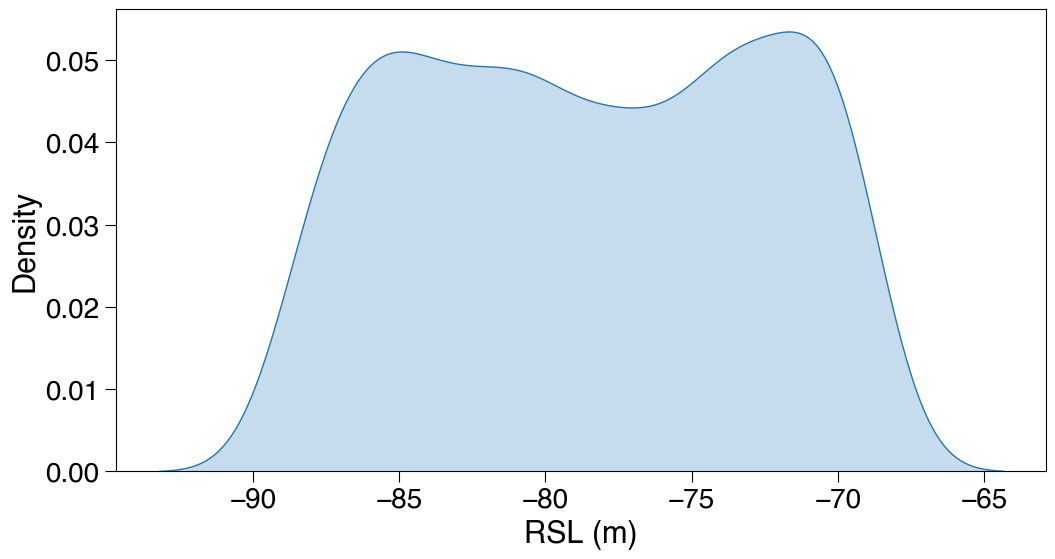

In [2]:
#load specific column of data
nu_l = coral_data['Palaeowater depth min']
nu_u = coral_data['Palaeowater depth max']
omega = -coral_data['Corrected Depth Below Sea Level, mbsl DS (m)']#paleo RSL is represented by omega, which is the oppsite of corredted depth below sea-level 

#plot the first RSL model, you can change the index to see different RSL model
index = 0

random_sample_num = 1000 #the number of samples draw from the data model

#try to visualize the first coral reef data
nu_1 = np.random.uniform(nu_l.iloc[index],nu_u.iloc[index],random_sample_num) #randomly draw samples from a coral living depth model, or inferential uncertainty model
epsilon_1 =  nu_1 #add two uncertainty model together
omega_1 = omega.iloc[index] 
y_1 = omega_1+epsilon_1 #add paleo RSL and two uncertainty together

sns.kdeplot(y_1,fill=True)
plt.xlabel('RSL (m)');

You can see the probablity density function (PDF) above represents the vertical part of data level of RSL reconstruction by a coral reef record. And to reconstruct a complete story, we also need to know when this coral record formed ($t$), which can be found in columns `Calibrated 14C age (Cal yr BP)` or `U-Th age (BP)` depends on which Radiometric dating technique was used for that record. Like reconstructed RSL $y$, the age of record ($t$) is also subject to uncertainty $\delta$ which is commonly assumed to be normally distributed:

$$
\delta \sim N(0,\sigma_{\delta})
$$

Based on this, we can also generate a model for RSL age:

$$
t_{i} = \overline{t}_{i} + \delta_{i}
$$

where $\overline{t}$ is the central point estimate of the calibrated age and $t$ is the true age. Let's visulise the age model as well


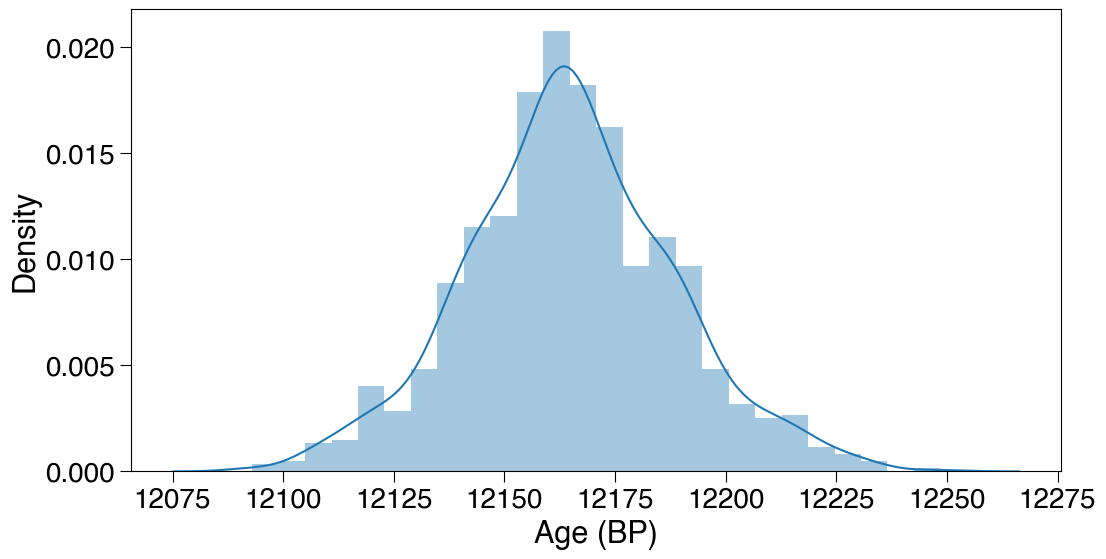

In [3]:
#load the data
radiocarbon_t = coral_data['Calibrated 14C age\n (Cal yr BP)']
radiocarbon_sigma = coral_data['±2s']/2
U_t = coral_data['U-Th age\n(BP)']
U_sigma = coral_data['±2s.1']/2
#a trick to combined radiocaron data and U-sereis data
radiocarbon_t[np.isnan(radiocarbon_t)] = 0
radiocarbon_sigma[np.isnan(radiocarbon_sigma)] = 0
U_t[np.isnan(U_t)] = 0
U_sigma[np.isnan(U_sigma)] = 0

#create age model
t_line = U_t + radiocarbon_t
t_sigma = U_sigma + radiocarbon_sigma

t_index = 0
t_line_i = t_line.iloc[t_index]
t_sigma_i = t_sigma.iloc[t_index]

sigma_delta = np.random.normal(0,t_sigma_i,random_sample_num)
t_i = t_line_i - sigma_delta

sns.distplot(t_i)
plt.xlabel('Age (BP)');

We can also plot the age model along with RSL model to get a temporal field of RSL change.

In [4]:
torch.manual_seed(20)
#------Define the process mdoel---------
linear_model = PSTHM.model.linear_model_uniform
test_X = torch.tensor(t_line)[:,None] #convert X to a 2D array which is more common for pytorch models
test_y =torch.tensor( omega+(nu_l+nu_u)/2 )#set y in the middle of the range
y_range = torch.tensor((nu_l+nu_u)/2 ) 
t_sigma = torch.tensor(t_sigma)

#-------Define parameter model---------
#you can change the prior distribution here to see how it affects the model!
intercept_prior = dist.Uniform(-30., 30.)
coefficient_prior = dist.Uniform(-1e-2,1e-2)
whitenoise_prior = dist.Uniform(1e-5,10)

mcmc = PSTHM.opti.mcmc_pyro_model(linear_model,[test_X,test_y,t_sigma,y_range,intercept_prior,coefficient_prior,whitenoise_prior],
                                  num_samples=10000,warmup_steps=1000)
hmc_samples_uni = {k: v.detach().cpu().numpy() for k, v in mcmc.get_samples().items()}

Sample: 100%|██████████| 11000/11000 [01:40, 109.93it/s, step size=2.55e-02, acc. prob=0.708]


Text(0.5, 0, 'White noise (m)')

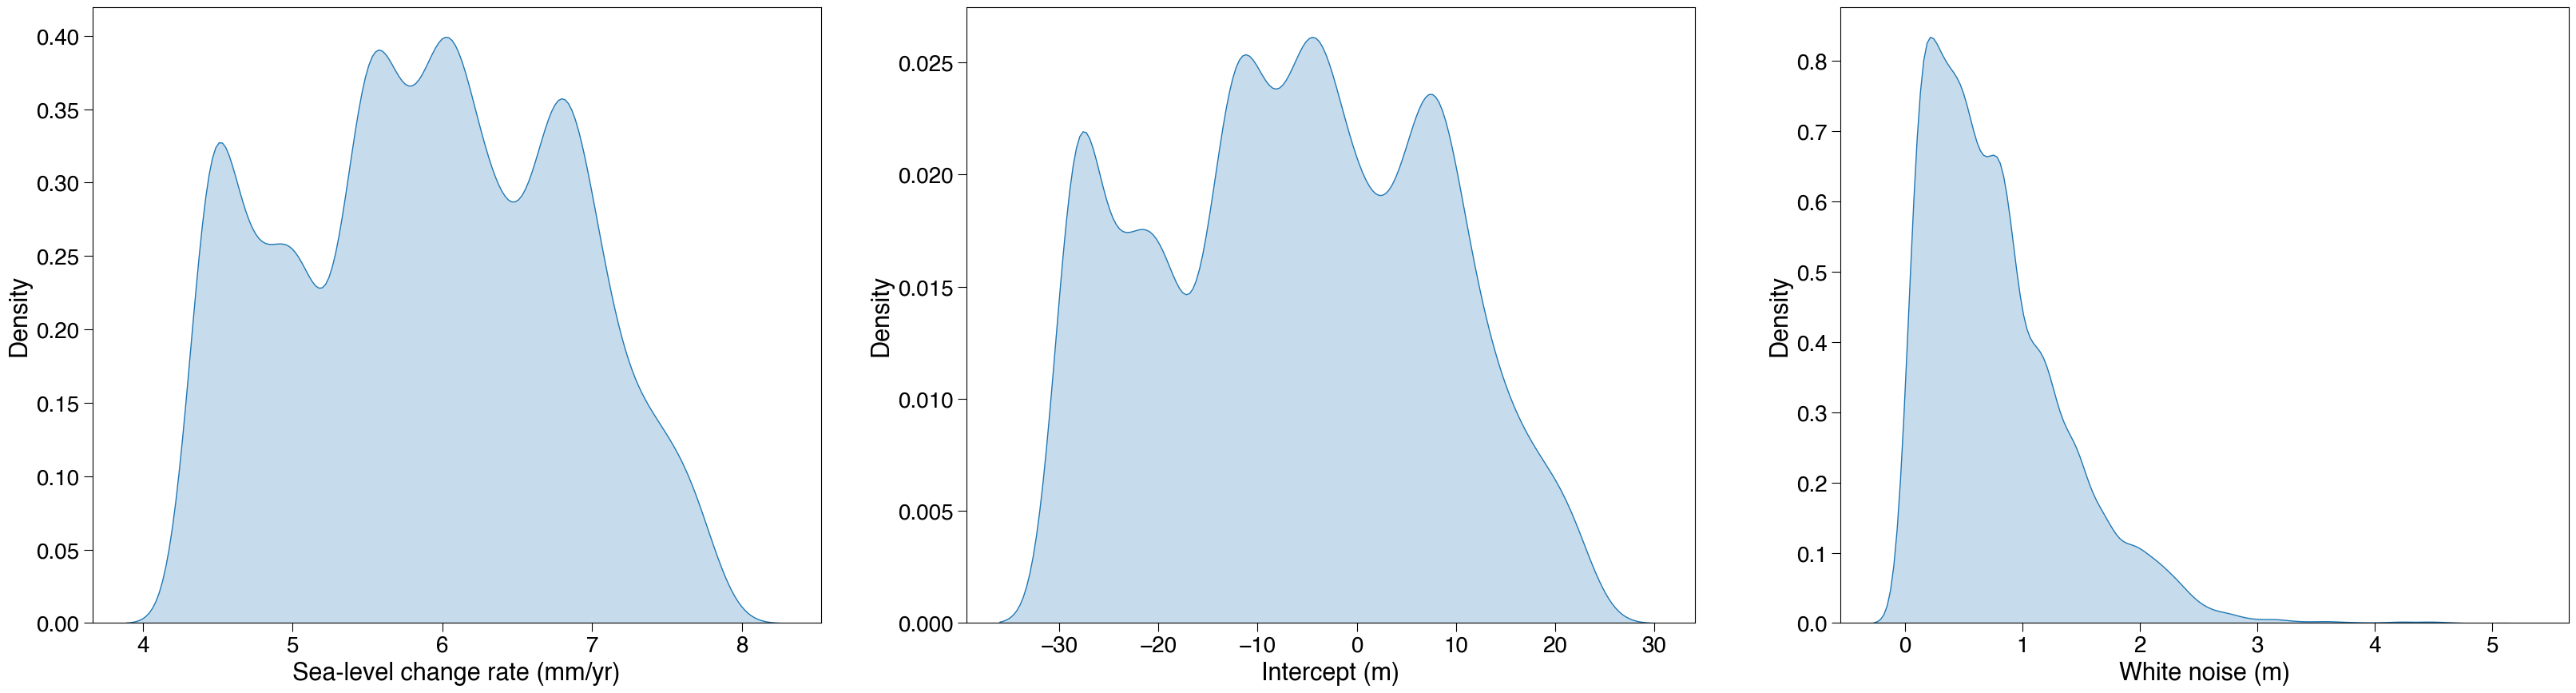

In [10]:
plt.figure(figsize=(40,10))
plt.subplot(131)
sns.kdeplot(-hmc_samples_uni['a']*1000,fill=True)
plt.xlabel('Sea-level change rate (mm/yr)')
plt.subplot(132)
sns.kdeplot(hmc_samples_uni['b'],fill=True)
plt.xlabel('Intercept (m)')
plt.subplot(133)
sns.kdeplot(hmc_samples_uni['whitenoise'],fill=True)
plt.xlabel('White noise (m)')

Text(0, 0.5, 'Sea-level change rate (m/year)')

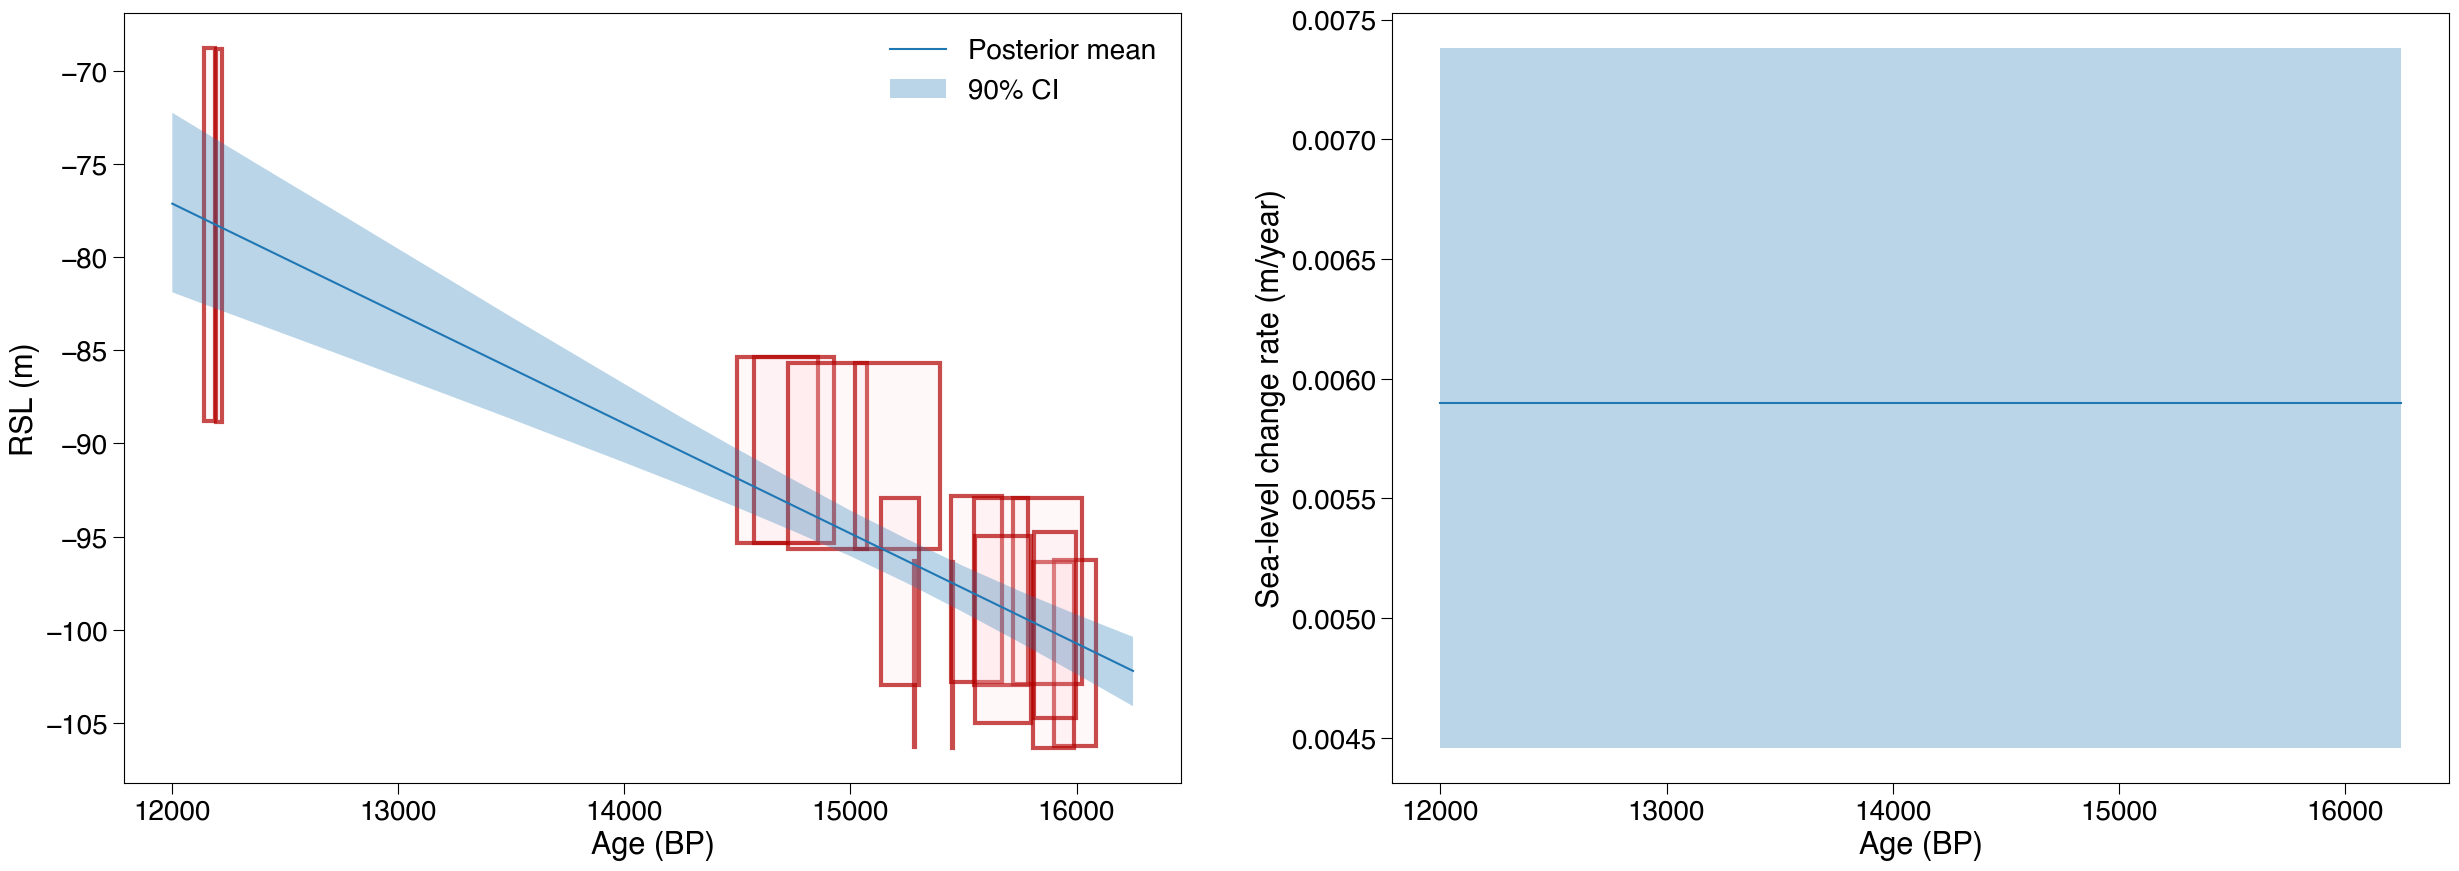

In [6]:
forward_x = np.arange(12000,16500,250)[:,None]
post_pred = hmc_samples_uni['a']*forward_x+hmc_samples_uni['b']
post_mean = post_pred.mean(axis=1)
post_05,post_95 = np.percentile(post_pred,[5,95],axis=1)
plt.figure(figsize=(30,10))
ax = plt.subplot(121)
PSTHM.plotting.plot_uncertainty_boxes(test_X[:,0],test_y,t_sigma,y_range,ax=ax)
plt.plot(forward_x[:,0],post_mean,label='Posterior mean')
plt.fill_between(forward_x[:,0],post_05,post_95,alpha=0.3,label='90% CI')
plt.xlabel('Age (BP)')
plt.legend()
plt.subplot(122)
mean_rate = -hmc_samples_uni['a'].mean()
post_rate_05,post_rate_95 = -np.percentile(hmc_samples_uni['a'],[5,95])
plt.plot(forward_x[:,0],[mean_rate]*len(forward_x))
plt.fill_between(forward_x[:,0],[post_rate_05]*len(forward_x),[post_rate_95]*len(forward_x),alpha=0.3)
plt.xlabel('Age (BP)')
plt.ylabel('Sea-level change rate (m/year)')


Now we have a nice data level model for coral reef records from the Great Barrier Reef. We can see that sea-level here rise 20-25 m between 15.5 ka to 12 ka, which covers a period of rapid global sea-level rise, called [Meltwater Pulse 1A](https://en.wikipedia.org/wiki/Meltwater_pulse_1A). 

#### Alternative inferential uncertainty model (i.e., Parameter Level)
The data level model is very flexible by setting different parameters, you can change $\nu_{1}$, $\nu_{2}$, $\delta$ to any other distributions based on your own assumption. For example, instead of assuming $\nu$ follows a uniform distribution, another common way to represent $\nu$ is:

$$
\nu_{2} \sim N((\tau_{l}+\tau_{u})/2,(\tau_{l}+\tau_{u})/4)
$$
which means $\nu$ follows a normal distribution with mean value in the middle of lower and upper limits with a quater of this range being used as the sigma for this distribution:
$$
\mu_{2} = (\tau_{l}+\tau_{u})/2 \\
\sigma_{2} = \sqrt{\sigma_{\mu}^2+((\tau_{l}+\tau_{u})/4)^2}
$$

Because a combination of two normally distributed variable will result in another normally distributed variable, therefore, some sea-level studies that assume a normally distributed RSL model will report a combined uncertainty by combining all uncertainty sources as:

$$
\epsilon_{2}  \sim N(\mu_{2},\sigma_{2})
$$




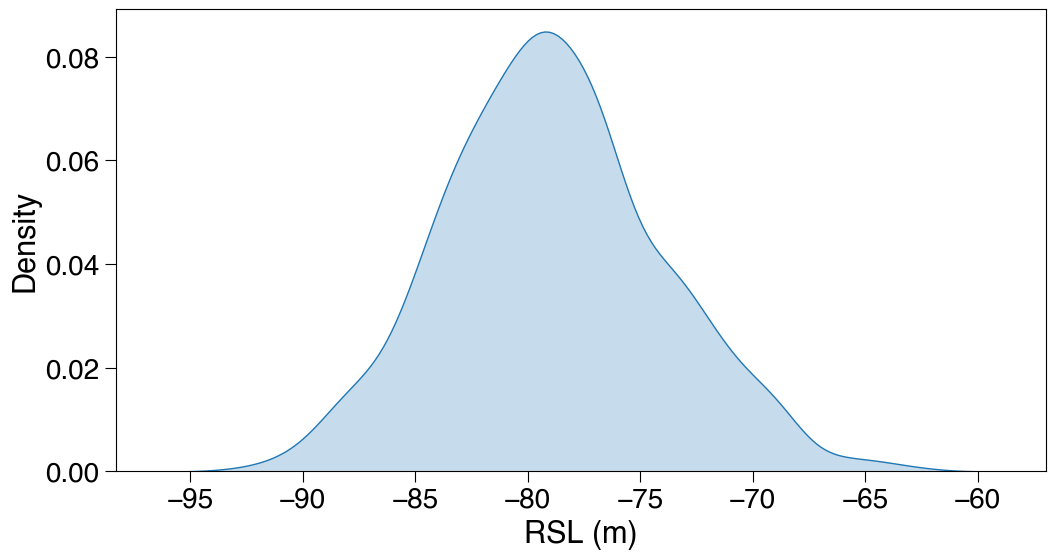

In [20]:
y_sigma = y_range/2 
index = 0

random_sample_num = 1000 #the number of samples draw from the data model

#try to visualize the first coral reef data
nu_1 = np.random.normal(0,y_sigma[index],random_sample_num) #randomly draw samples from a coral living depth model, or inferential uncertainty model
epsilon_1 =  nu_1 #add two uncertainty model together

y_1 = test_y[index]+epsilon_1 #add paleo RSL and two uncertainty together

sns.kdeplot(y_1,fill=True)
plt.xlabel('RSL (m)');

In [21]:
torch.manual_seed(0)
#------Define the process mdoel---------
linear_model = PSTHM.model.linear_model
y_sigma = y_range/2
#-------Define parameter model---------
#you can change the prior distribution here to see how it affects the model!
intercept_prior = dist.Uniform(-30., 30.)
coefficient_prior = dist.Uniform(-1e-2,1e-2)
whitenoise_prior = dist.Uniform(1e-5,10)

mcmc = PSTHM.opti.mcmc_pyro_model(linear_model,[test_X,test_y,t_sigma,y_sigma,intercept_prior,coefficient_prior,whitenoise_prior],
                                  num_samples=10000,warmup_steps=1000)
hmc_samples_normal = {k: v.detach().cpu().numpy() for k, v in mcmc.get_samples().items()}

Sample: 100%|██████████| 11000/11000 [15:53, 11.54it/s, step size=3.86e-02, acc. prob=0.941]


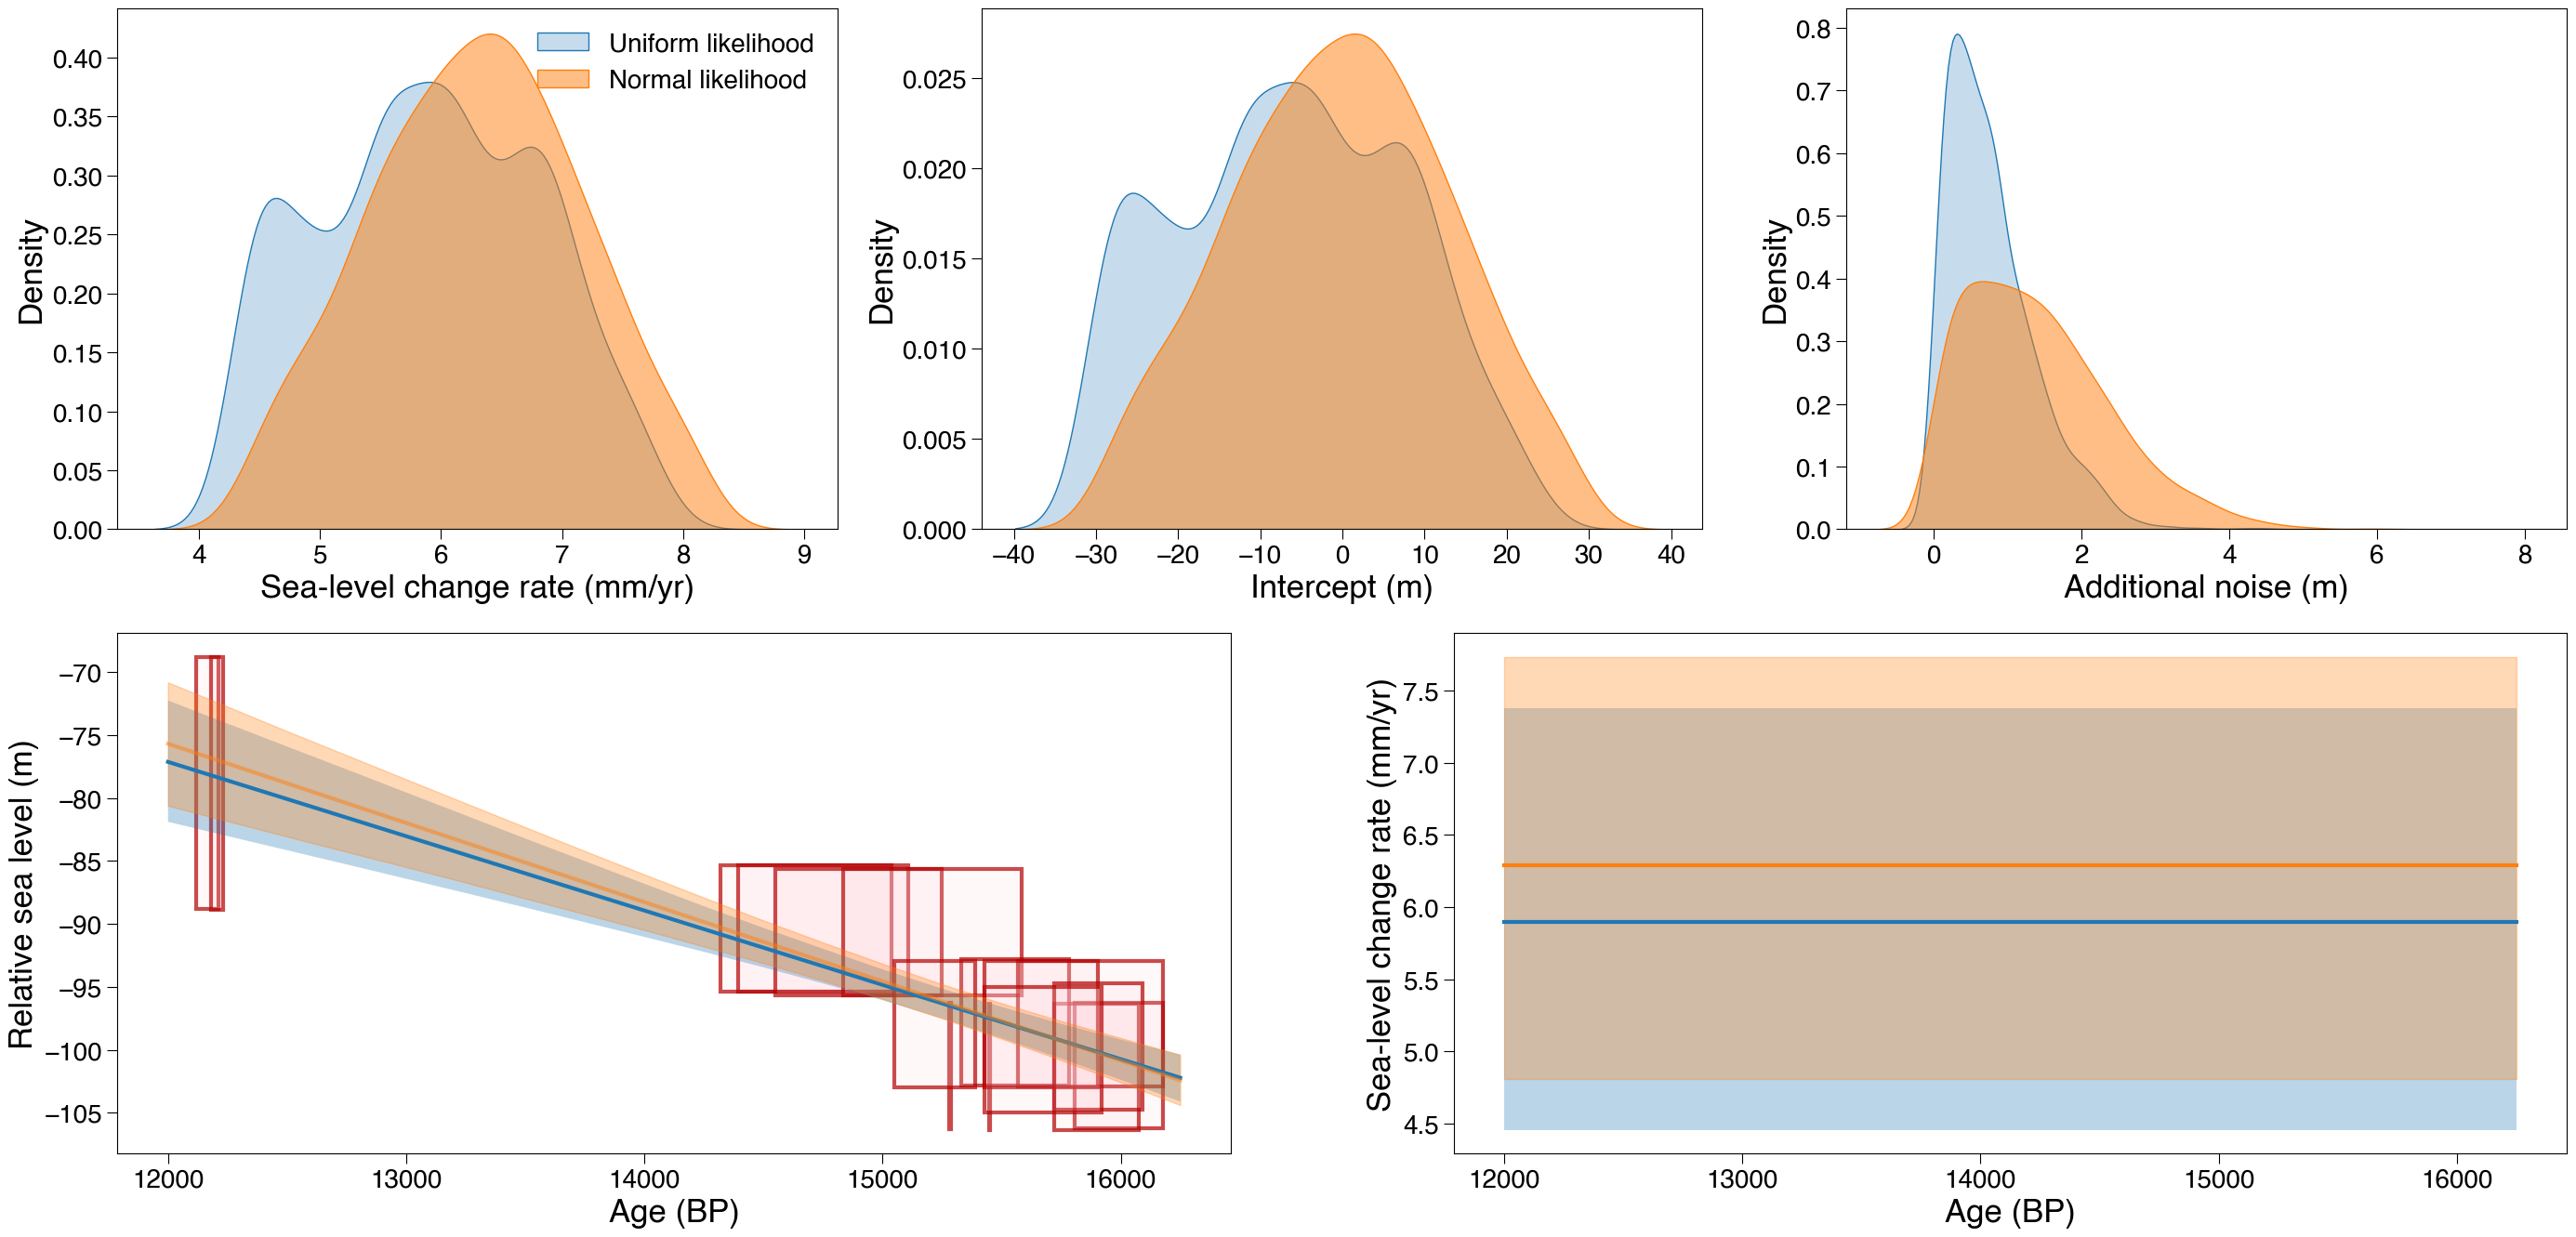

In [127]:
forward_x = np.arange(12000,16500,250)[:,None]
post_pred_normal = hmc_samples_normal['a']*forward_x+hmc_samples_normal['b']
post_mean_normal = post_pred_normal.mean(axis=1)
post_05_normal,post_95_normal = np.percentile(post_pred_normal,[5,95],axis=1)

plt.figure(figsize=(34,16))
plt.subplot(231)
sns.kdeplot(-hmc_samples_uni['a']*1000,fill=True,label='Uniform likelihood', bw_method=0.25)
sns.kdeplot(-hmc_samples_normal['a']*1000,fill=True,label='Normal likelihood',alpha=0.5, bw_method=0.25)
plt.legend()
plt.xlabel('Sea-level change rate (mm/yr)',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.subplot(232)
sns.kdeplot(hmc_samples_uni['b'],fill=True, bw_method=0.25)
sns.kdeplot(hmc_samples_normal['b'],fill=True,alpha=0.5, bw_method=0.25)
plt.ylabel('Density',fontsize=25)
plt.xlabel('Intercept (m)',fontsize=25)
plt.subplot(233)
sns.kdeplot(hmc_samples_uni['whitenoise'],fill=True, bw_method=0.25)
sns.kdeplot(hmc_samples_normal['whitenoise'],fill=True,alpha=0.5, bw_method=0.25)
plt.xlabel('Additional noise (m)',fontsize=25)
plt.ylabel('Density',fontsize=25)

ax = plt.subplot(223)
PSTHM.plotting.plot_uncertainty_boxes(test_X[:,0],test_y,t_sigma*2,y_range,ax=ax)
plt.plot(forward_x[:,0],post_mean,linewidth = 3)
plt.fill_between(forward_x[:,0],post_05,post_95,alpha=0.3)
plt.plot(forward_x[:,0],post_mean_normal,alpha=0.5,color='C1',linewidth = 3)
plt.fill_between(forward_x[:,0],post_05_normal,post_95_normal,alpha=0.3,color='C1')
plt.ylabel('Relative sea level (m)',fontsize=25)
plt.xlabel('Age (BP)',fontsize=25)
plt.subplot(224)
mean_rate_normal = -hmc_samples_normal['a'].mean()
post_rate_05_normal,post_rate_95_normal = -np.percentile(hmc_samples_normal['a'],[5,95])
plt.plot(forward_x[:,0],[mean_rate*1000]*len(forward_x),linewidth = 3)
plt.fill_between(forward_x[:,0],[post_rate_05*1000]*len(forward_x),[post_rate_95*1000]*len(forward_x),alpha=0.3)
plt.plot(forward_x[:,0],[mean_rate_normal*1000]*len(forward_x),color='C1',linewidth = 3)
plt.fill_between(forward_x[:,0],[post_rate_05_normal*1000]*len(forward_x),[post_rate_95_normal*1000]*len(forward_x),alpha=0.3,color='C1')
plt.xlabel('Age (BP)',fontsize=25)
plt.ylabel('Sea-level change rate (mm/yr)',fontsize=25)
plt.savefig('data_level.pdf',bbox_inches='tight',dpi=300)
plt.show()


You will find that two data models yield similar estimates for the sea-level change trend and rate, with the posterior distributions of the model parameters largely overlapping. However, there are some noticeable differences: a normal likelihood results in a posterior distribution resembling a normal distribution, whereas a uniform likelihood leads to a uniformly distributed posterior.

Ok! I hope you have a good understanding of how to build a data model here, the next tutorial will cover different process level modelling techiniques to infer sea-level change pattern and rate from data model. 

Thanks for going through this tutorial, we are actively developing PaleoSTeHM now, so your feedback will be truely valueable to us. You can fill this [survey](https://forms.gle/W1DMPQY8KyAgoT9r6) to let us know what do you think about this tutorial, which will shape the future direction of PaleoSTeHM.